In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_NG_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,NaN,NaN,72.0,NaN,0.0,33.6,0.627,50.0
1,1.0,NaN,66.0,NaN,0.0,NaN,NaN,31.0
2,8.0,183.0,NaN,NaN,0.0,23.3,0.672,NaN
3,1.0,89.0,66.0,23.0,94.0,NaN,0.167,21.0
4,0.0,NaN,NaN,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,NaN,180.0,32.9,0.171,NaN
764,NaN,122.0,70.0,NaN,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,NaN,112.0,NaN,0.245,30.0
766,1.0,126.0,60.0,0.0,NaN,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	114
float64		column 2	190
float64		column 3	76
float64		column 4	266
float64		column 5	152
float64		column 6	76
float64		column 7	190
float64		column 8	152


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,654.000000,578.000000,692.000000,502.000000,616.000000,692.000000,578.000000,616.000000
mean,3.810398,120.036332,69.596821,20.934263,76.451299,31.993786,0.464941,32.951299
std,3.309111,30.365715,18.437147,15.005577,110.537111,7.692516,0.304982,11.143450
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,100.000000,64.000000,7.000000,0.000000,27.500000,0.256250,24.000000
50%,3.000000,117.000000,72.000000,23.000000,42.500000,32.000000,0.391000,29.000000
75%,6.000000,137.000000,80.000000,32.000000,120.000000,36.100000,0.600000,39.000000
max,17.000000,198.000000,114.000000,99.000000,846.000000,67.100000,2.329000,81.000000


<AxesSubplot:>

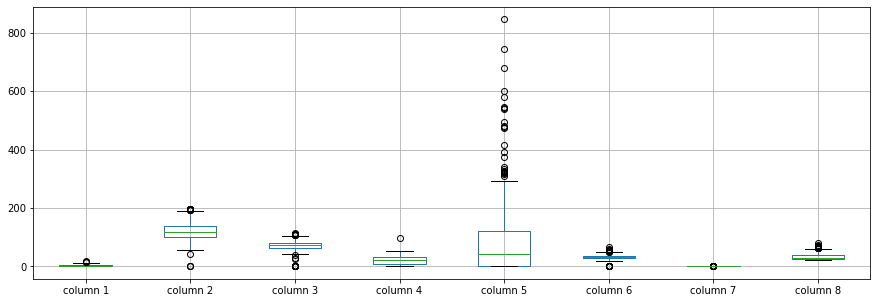

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.810398
column 2    120.036332
column 3     69.596821
column 4     20.934263
column 5     76.451299
column 6     31.993786
column 7      0.464941
column 8     32.951299
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.106047,0.138038,-0.073481,-0.091190,0.047401,-0.024746,0.538346
column 2,0.106047,1.000000,0.170855,0.141260,0.289552,0.193536,0.046641,0.272194
column 3,0.138038,0.170855,1.000000,0.145907,0.036201,0.272898,0.065398,0.220979
column 4,-0.073481,0.141260,0.145907,1.000000,0.377154,0.365229,0.147074,-0.066392
column 5,-0.091190,0.289552,0.036201,0.377154,1.000000,0.152618,0.192208,-0.019147
column 6,0.047401,0.193536,0.272898,0.365229,0.152618,1.000000,0.075645,0.090980
column 7,-0.024746,0.046641,0.065398,0.147074,0.192208,0.075645,1.000000,0.061250
column 8,0.538346,0.272194,0.220979,-0.066392,-0.019147,0.090980,0.061250,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+67,8+67+67,8+67+67+67,8+67+67+67+67,8+67+67+67+67+67,8+67+67+67+67+67+67,8+67+67+67+67+67,8+67+67+67+67,8+67+67+67,8+67+67,8+67,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 336.8740069071452
Epoch: 1 , loss: 333.56747913360596
Epoch: 2 , loss: 335.2998339335124
Epoch: 3 , loss: 331.3590227762858
Epoch: 4 , loss: 329.6193332672119
Epoch: 5 , loss: 326.7027390797933
Epoch: 6 , loss: 325.56925042470294
Epoch: 7 , loss: 320.987637201945
Epoch: 8 , loss: 315.2927474975586
Epoch: 9 , loss: 312.6237408320109
Epoch: 10 , loss: 309.7145404815674
Epoch: 11 , loss: 302.44311809539795
Epoch: 12 , loss: 303.08672491709393
Epoch: 13 , loss: 296.348788579305
Epoch: 14 , loss: 289.4646135965983
Epoch: 15 , loss: 289.6796344121297
Epoch: 16 , loss: 279.14773082733154
Epoch: 17 , loss: 281.95973777770996
Epoch: 18 , loss: 272.2681900660197
Epoch: 19 , loss: 268.4162925084432
Epoch: 20 , loss: 261.5118052164714
Epoch: 21 , loss: 259.07564576466876
Epoch: 22 , loss: 255.76024850209555
Epoch: 23 , loss: 251.67927265167236
Epoch: 24 , loss: 249.3700796763102
Epoch: 25 , loss: 248.28747940063477

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000000
column 2    99.000000
column 3    84.000000
column 4    18.359762
column 5    52.572189
column 6    35.400000
column 7     0.537480
column 8    50.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,-3.681077,-38.937698,0.000000,-12.992231,0.000000,0.000000,0.000000,0.000000
1,0.000000,45.359558,0.000000,-2.659754,0.000000,11.321543,0.257233,0.000000
2,0.000000,0.000000,4.965630,22.848864,0.000000,0.000000,0.000000,-0.366962
3,0.000000,0.000000,0.000000,0.000000,0.000000,-6.203781,0.000000,0.000000
4,0.000000,3.577866,46.622581,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
763,0.000000,0.000000,0.000000,-47.604337,0.000000,0.000000,0.000000,-62.531593
764,0.409455,0.000000,0.000000,-7.833023,0.000000,0.000000,0.000000,0.000000
765,0.000000,0.000000,0.000000,2.466776,0.000000,10.458836,0.000000,0.000000
766,0.000000,0.000000,0.000000,0.000000,104.955139,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(2199.665912851298, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.38079059603742393

In [18]:
new_df.iloc[66,:]

column 1      0.000000
column 2    109.000000
column 3     88.000000
column 4     12.029756
column 5      0.000000
column 6     32.500000
column 7      0.855000
column 8     38.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,2.318923,109.062302,72.000000,22.007769,0.000000,33.600000,0.627000,50.000000
1,1.000000,130.359558,66.000000,26.340246,0.000000,37.921543,0.608233,31.000000
2,8.000000,183.000000,68.965630,22.848864,0.000000,23.300000,0.672000,31.633038
3,1.000000,89.000000,66.000000,23.000000,94.000000,21.896219,0.167000,21.000000
4,0.000000,140.577866,86.622581,35.000000,168.000000,43.100000,2.288000,33.000000
...,...,...,...,...,...,...,...,...
763,10.000000,101.000000,76.000000,0.395663,180.000000,32.900000,0.171000,0.468407
764,2.409455,122.000000,70.000000,19.166977,0.000000,36.800000,0.340000,27.000000
765,5.000000,121.000000,72.000000,25.466776,112.000000,36.658836,0.245000,30.000000
766,1.000000,126.000000,60.000000,0.000000,104.955139,30.100000,0.349000,47.000000


In [20]:
imputations[-1].to_excel("PID_NG_20.xlsx", index=False, header=False)